**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 2: Machine Learning*

# Identification

Name: Lootii Kiri<br/>
Student Number: 300189957

Name: Jenson Wu<br/>
Student Number:

# 1. Exploratory Analysis

## Data Exploration

In this assignment, we will utilize the Diabetes Prediction Dataset, accessible via [Diabetes Prediction Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data). To mitigate the complexity associated with Kaggle's login requirement, the dataset has been made available on a public GitHub repository:

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2)

You can access and read the dataset directly from this GitHub repository in your Jupyter notebook.

In [2]:
# Code cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

1. **Load the dataset and provide a summary of its structure**:

    - Describe the features (columns), their data types, and the target variable.

In [8]:
# Code cell
url = "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a2/diabetes_prediction_dataset.csv"
data = pd.read_csv(url)

#display first 5 rows of the dataset to ensure that it has succesfully been loaded
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [9]:
# summary of the dataset 
data.info()

# describe numerical columns
data.describe()

# Check missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## Summary of Dataset Structure

https://www.w3schools.com/python/pandas/ref_df_info.asp#:~:text=The%20info()%20method%20prints,method%20actually%20prints%20the%20info.

The dataset used for this assignment contains features related to individuals health and lifestyle factors that may influence diabetes. Below is a detailed description of the features:

| Feature               | Description                                                                 | Data Type   |
|-----------------------|-----------------------------------------------------------------------------|-------------|
| **gender**             | The gender of the individual (Male/Female)                                  | Categorical |
| **age**                | The age of the individual (in years)                                        | Continuous  |
| **hypertension**       | Indicates if the individual has hypertension (1 = Yes, 0 = No)              | Categorical |
| **heart_disease**      | Indicates if the individual has heart disease (1 = Yes, 0 = No)             | Categorical |
| **smoking_history**    | The smoking status of the individual (e.g., never, current, No Info)        | Categorical |
| **bmi**                | Body Mass Index (BMI) of the individual                                     | Continuous  |
| **HbA1c_level**        | Level of glycated hemoglobin (HbA1c) in the individual's blood              | Continuous  |
| **blood_glucose_level**| Blood glucose level of the individual (in mg/dL)                            | Continuous  |
| **diabetes**           | Target variable indicating diabetes status (1 = Diabetes, 0 = No Diabetes)  | Categorical |

### Target Variable:
- **diabetes**: This is the target variable that we aim to predict. It indicates whether the individual has diabetes (1) or not (0).

### Data Types:
- **Categorical features**: `gender`, `hypertension`, `heart_disease`, `smoking_history`, `diabetes`.
- **Continuous features**: `age`, `bmi`, `HbA1c_level`, `blood_glucose_level`.

### Insights:
- The dataset contains a mix of both categorical and continuous features. 9 columns (8 attribute/features and 1 target)
- There are 100000 entries
- There is one target variable: **diabetes**.
- This dataset can be used for binary classification (predicting diabetes status).

### Missing Data:
- From a quick glance at the first few rows of the dataset, we can see that it has some missing values categrorized as "No Info" in the `smoking_history` feature.
- In terms of null values, they are not present in any of the columns of this dataset 


2. **Feature Distribution Analysis**:

    - Examine the distribution of each feature using appropriate visualizations such as histograms and boxplots. Discuss insights gained, including the presence of outliers.

Continuous Features Distribution Information:

age:
count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

bmi:
count    100000.000000
mean         27.320767
std           6.636783
min          10.010000
25%          23.630000
50%          27.320000
75%          29.580000
max          95.690000
Name: bmi, dtype: float64

HbA1c_level:
count    100000.000000
mean          5.527507
std           1.070672
min           3.500000
25%           4.800000
50%           5.800000
75%           6.200000
max           9.000000
Name: HbA1c_level, dtype: float64

blood_glucose_level:
count    100000.000000
mean        138.058060
std          40.708136
min          80.000000
25%         100.000000
50%         140.000000
75%         159.000000
max         300.000000
Name: blood_glucose_level, dtype: float64


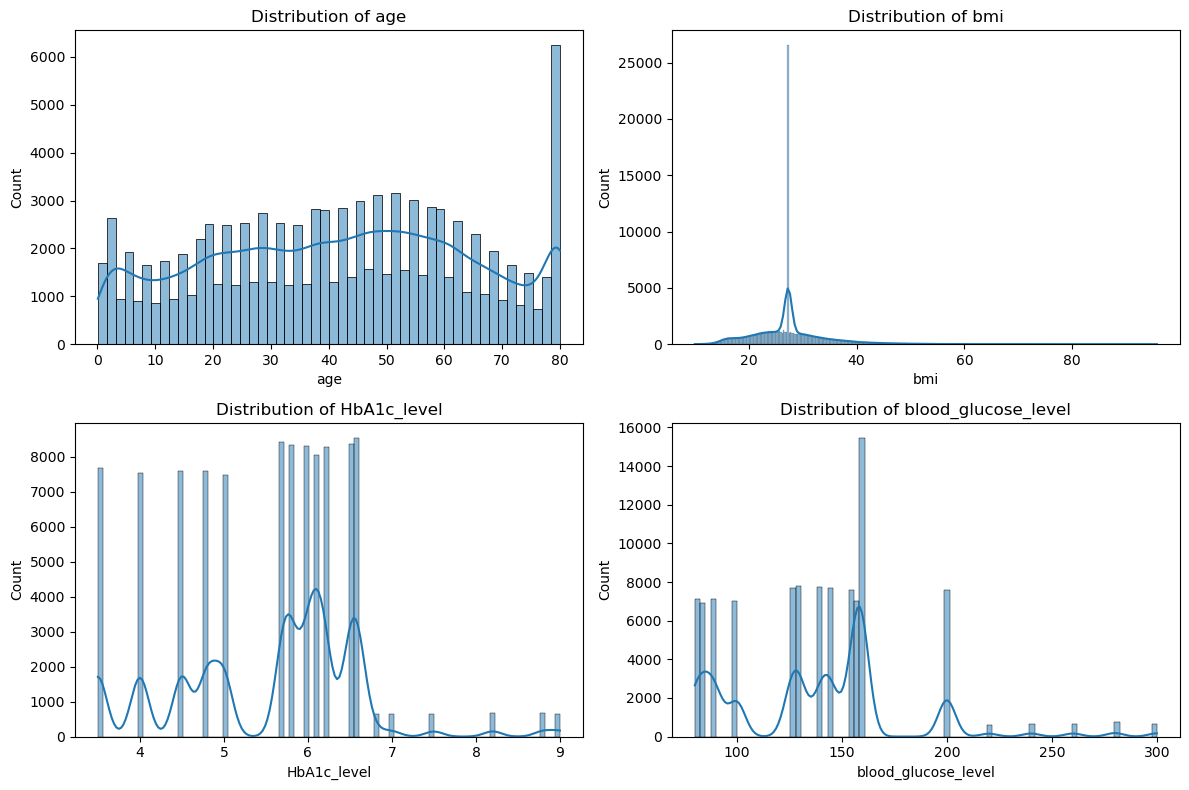

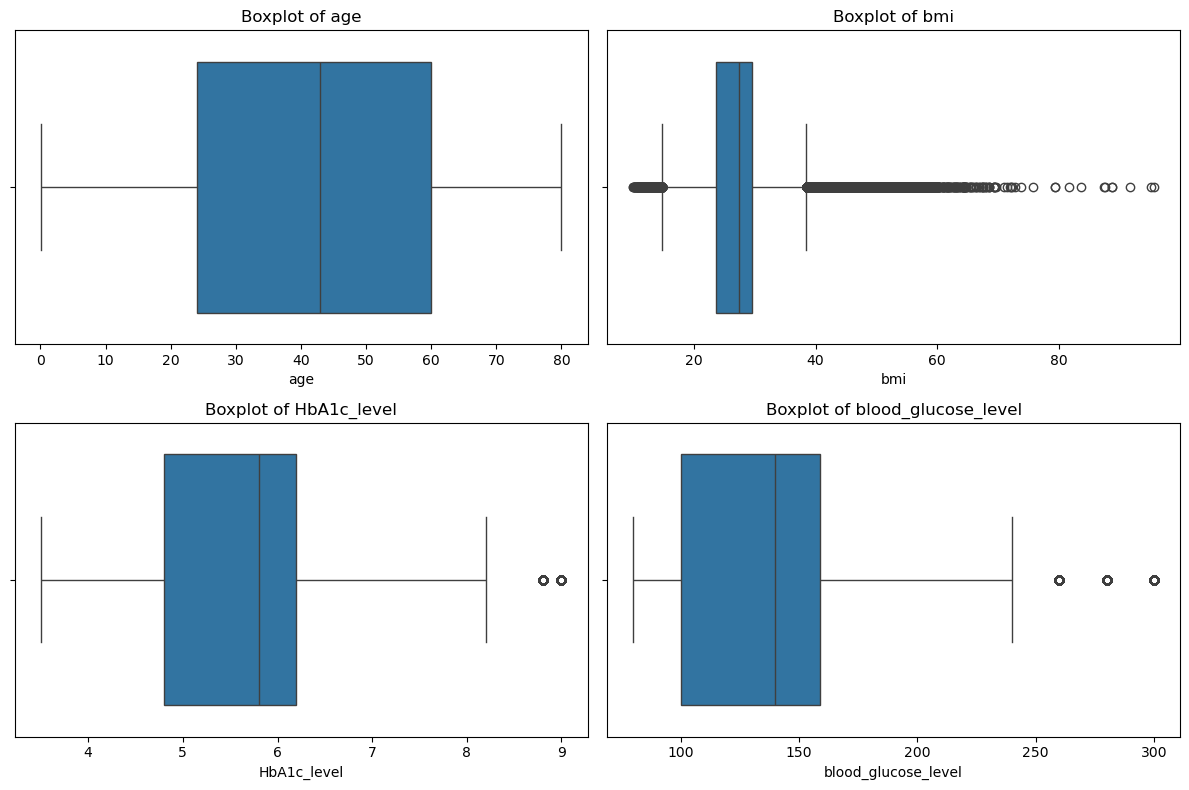


Categorical Features Distribution Information:

gender:
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

hypertension:
hypertension
0    92515
1     7485
Name: count, dtype: int64

heart_disease:
heart_disease
0    96058
1     3942
Name: count, dtype: int64

smoking_history:
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


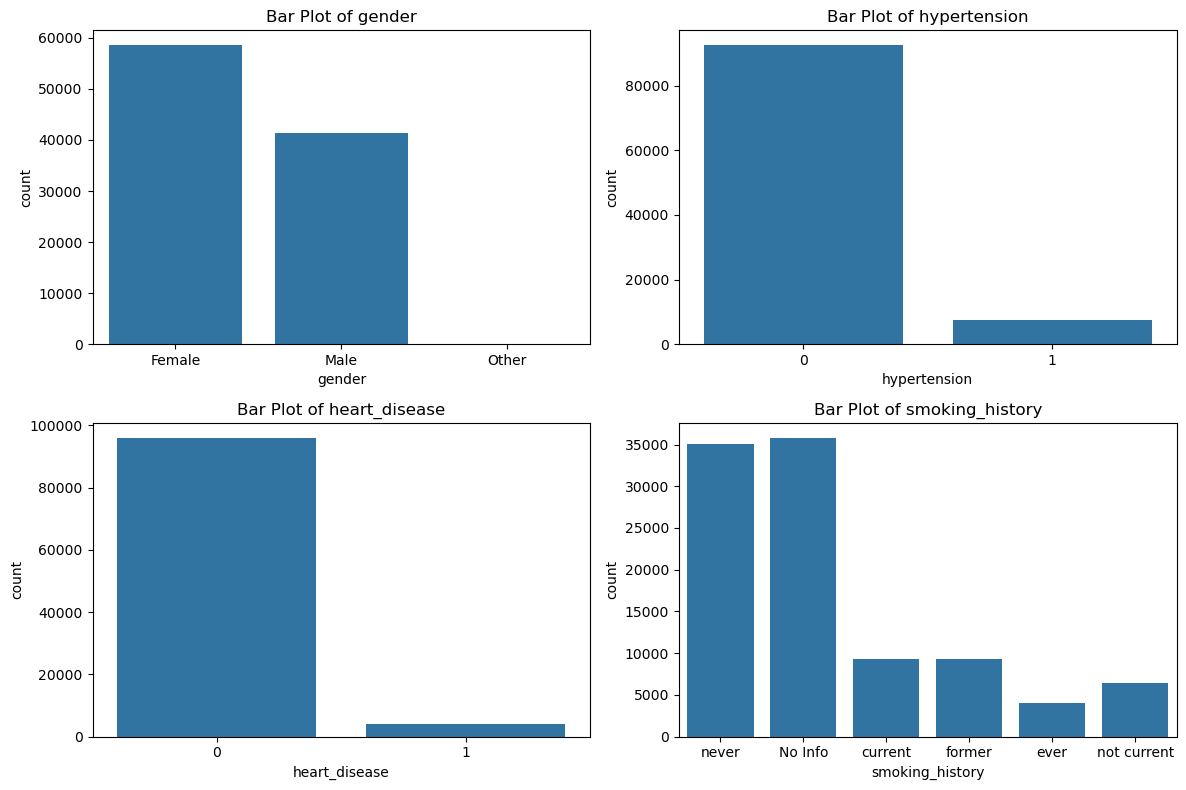

In [10]:
# Define continuous and categorical features in seperate lists to handle them differently 
continuous_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

# This is just to display the numbers for easier analysis on continuous features
print("Continuous Features Distribution Information:")
for col in continuous_features:
    print(f"\n{col}:")
    print(data[col].describe())
    
# Histograms for continuous numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(continuous_features):
    plt.subplot(2, 2, i + 1) #since theres 4 features in each list I chose a 2x2 grid layout. current plot shown in i+1 position of the grid.
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Boxplots for detecting outliers in continuous numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(continuous_features):
    plt.subplot(2, 2, i + 1)  
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# this is also to display the numbers for catgeorical analysis
print("\nCategorical Features Distribution Information:")
for col in categorical_features:
    print(f"\n{col}:")
    print(data[col].value_counts()) 

# Bar plots for categorical/binary features
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=data[col])
    plt.title(f'Bar Plot of {col}')
plt.tight_layout()
plt.show()


### Insights from Feature Distribution Analysis

#### Categorical Features

https://www.datacamp.com/tutorial/how-to-make-a-seaborn-histogram

https://seaborn.pydata.org/generated/seaborn.barplot.html

https://www.tutorialspoint.com/seaborn/seaborn_boxplot_method.htm


- **Gender**: 
  - The dataset contains 58,552 females, 41,430 males, and 18 individuals identified as "Other." 
  - This indicates a fairly balanced dataset in terms of female and male gender, though the category "Other" has very few entries, which could impact modeling performance if included.

- **Hypertension**:
  - 92,515 individuals do not have hypertension, while 7,485 do.
  - This shows a large imbalance, with far more individuals without hypertension, which could influence prediction outcomes if hypertension is a feature in the model.

- **Heart Disease**:
  - 96,058 individuals do not have heart disease, and only 3,942 do.
  - This is another imbalanced feature, with significantly more individuals not having heart disease, which should be considered when evaluating its impact on the model.

- **Smoking History**:
  - The most common smoking status is "No Info" (35,816 individuals), followed by "never" (35,095). Other categories such as "former" (9,352), "current" (9,286), "not current" (6,447), and "ever" (4,004) are much smaller.
  - The high occurrence of "No Info" might affect the reliability of the smoking history feature and could be handled using imputation strategies or exclusion, depending on its importance.

#### Continuous Features

- **Age**:
  - The age distribution ranges from 0.08 to 80 years, with a mean of 41.89 years. The 25th percentile is 24 years, the median is 43 years, and the 75th percentile is 60 years.
  - Outliers are at the very low end (near zero) and very high end of the age distribution. 

- **BMI**:
  - BMI ranges from 10.01 to 95.69, with a mean of 27.32. The interquartile range (IQR) is between 23.63 and 29.58.
  - The maximum BMI value (95.69) suggests the presence of outliers, as it is significantly higher than typical values. 

- **HbA1c Level**:
  - The HbA1c levels range from 3.5 to 9.0, with a mean of 5.53. The 25th percentile is 4.8, the median is 5.8, and the 75th percentile is 6.2.
  - This feature seems relatively normally distributed, but outliers may exist on the higher end.

- **Blood Glucose Level**:
  - Blood glucose levels range from 80 to 300, with a mean of 138.06. The IQR lies between 100 and 159, with a median of 140.
  - There are likely outliers at the higher end, as values above 200 or close to the maximum of 300 indicate very high blood glucose levels.



3. **Target Variable Distribution**:

    - Analyze the distribution of the target variable to identify class imbalances. Use bar plots to visualize the class frequencies.

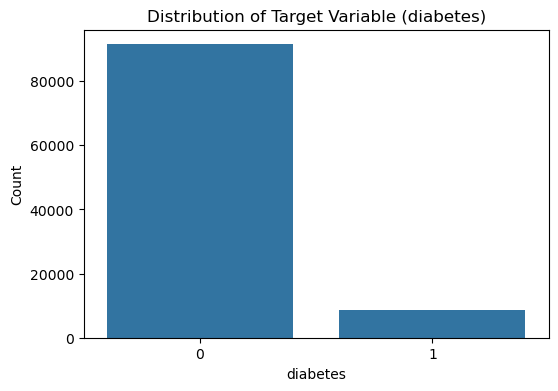

diabetes
0    91500
1     8500
Name: count, dtype: int64


In [11]:
# Count the target variable values
target_counts = data['diabetes'].value_counts()

# barplot of the target variable
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Distribution of Target Variable (diabetes)')
plt.xlabel('diabetes')
plt.ylabel('Count')
plt.show()

#print the values to see the numbers of 0 and 1. 
print(target_counts)

## Analysis of Target Variable Distribution

The distribution of the target variable, `diabetes`, reveals significant class imbalances in the dataset. The counts for each class are as follows:

- **Class 0 (No Diabetes)**: 91,500 instances
- **Class 1 (Diabetes)**: 8,500 instances

### Class Imbalance

The data shows a considerable imbalance between the two classes, with Class 0 (individuals without diabetes) being overwhelmingly larger than Class 1 (individuals with diabetes). This results in a ratio of approximately **10.77:1** indicating that the dataset is skewed towards the majority class.

Class imbalance is a critical consideration in predictive modeling, as it can lead to biased models that tend to predict the majority class more frequently, potentially neglecting the minority class. In our case, a model trained on this dataset might predict that an individual does not have diabetes more often, which could reduce the model's effectiveness in identifying those who do have the condition.

### Visualization of Class Frequencies

The bar plot generated from the target variable distribution effectively illustrates the class frequencies:

- **Bar for Class 0**: This bar is significantly taller, visually representing the 91,500 instances of individuals without diabetes.
- **Bar for Class 1**: This bar is much shorter, highlighting the 8,500 instances of individuals with diabetes.

The difference in the height of the two bars in the plot provides a clear visual representation of the class imbalance.


4. **Data Splitting**:

    - Split the dataset into training (80%) and test (20%) sets using the holdout method.

    - Ensure that this split occurs before any preprocessing to avoid data leakage.

In [12]:
# Set the dataset into features (X) and target (y)
X = data.drop('diabetes', axis=1)  # Features
y = data['diabetes']  # Target

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# print split sizes to confirm 
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (80000, 8)
Test set size: (20000, 8)


## Data Pre-Processing

5. **Categorical Variable Encoding**:

    - Encode any categorical variables. Justify the chosen method.

In [27]:

# Applying OneHotEncoding to categorical variables in the training set
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit only training data 
X_train_encoded = encoder.fit_transform(X_train[['gender', 'smoking_history']])

# must apply the same transformation to the test set but without refitting 
X_test_encoded = encoder.transform(X_test[['gender', 'smoking_history']])


#just to verify that it is encoded. convert numpy to dataframe and print first few rows. 

# Get the feature names for the encoded columns
encoded_feature_names = encoder.get_feature_names_out(['gender', 'smoking_history'])

X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names)
print("Encoded Training Set:")
print(X_train_encoded_df.head())

print("\nEncoded Test Set:")
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names)
X_test_encoded_df.head()



Encoded Training Set:
   gender_Male  gender_Other  smoking_history_current  smoking_history_ever  \
0          0.0           0.0                      0.0                   0.0   
1          0.0           0.0                      0.0                   0.0   
2          0.0           0.0                      0.0                   0.0   
3          0.0           0.0                      1.0                   0.0   
4          0.0           0.0                      0.0                   0.0   

   smoking_history_former  smoking_history_never  smoking_history_not current  
0                     1.0                    0.0                          0.0  
1                     0.0                    1.0                          0.0  
2                     0.0                    0.0                          0.0  
3                     0.0                    0.0                          0.0  
4                     0.0                    0.0                          0.0  

Encoded Test Set:


,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Data Pre-Processing: Categorical Variable Encoding

#### Categorical Features

The following are our categorical variables:
1. **Gender** (Female, Male, Other)
2. **Hypertension** (0, 1)
3. **Heart Disease** (0, 1)
4. **Smoking History** (No Info, never, former, current, not current, ever)

#### Chosen Encoding Methods:

1. **Binary Encoding (Hypertension, Heart Disease)**:
   - Both **hypertension** and **heart disease** are binary variables where 0 represents the absence of the condition and 1 represents the presence. These features are already in a format suitable for modeling therefore do not require any additional encoding.
   
2. **One-Hot Encoding (Gender, Smoking History)**:
   - **Gender** has three categories: *Female*, *Male*, and *Other*. Since this is a nominal categorical variable (with no inherent order), one-hot encoding is the most appropriate choice. One-hot encoding creates three new binary columns ( `gender_Female`, `gender_Male` and `gender_Other`), where each row will have a 1 in the column representing the individual's gender and 0s in the other columns.
   - **Smoking History** is another nominal categorical variable with multiple categories: *No Info*, *never*, *former*, *current*, *not current*, and *ever*. Thus one-hot encoding is the best approach here once again. Each smoking history category will be transformed into its own binary column. 

#### Justification of Encoding Methods:

- **One-Hot Encoding**:
  - One-hot encoding is ideal for nominal categorical variables because it does not impose any ordinal relationships between the categories. Just like in our case of *gender* and *smoking history*. One-hot encoding ensures that the model treats each category as independent, without assuming any relationship between them.

- **Binary Encoding**:
  - Binary encoding is suitable for categorical variables with two levels, such as *hypertension* and *heart disease*. Since these variables already exist as binary features, no further encoding is needed. 

using one-hot on binary categorical features will only cause unnecessary redundancy. 

https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python

https://stackoverflow.com/questions/43515877/should-binary-features-be-one-hot-encoded



6. **Normalization/Standardization of Numerical Features**:

    - Normalize or standardize numerical features if necessary. Describe the technique used (e.g., Min-Max scaling, StandardScaler) and explain why it is suitable for this dataset.

    - Ensure that this technique is applied only to the training data, with the same transformation subsequently applied to the test data without fitting on it.

In [ ]:
# Code cell

## Model Development & Evaluation

7. **Model Development**:

    - Implement the machine learning models covered in class: Decision Trees, K-Nearest Neighbors (KNN), and Logistic Regression. Use the default parameters of scikit-learn as a baseline for training each model.

In [ ]:
# Code cell

8. **Model Evaluation**:

    - Use cross-validation to evaluate each model, justifying your choice of the number of folds.

    - Assess the models using metrics such as precision, recall, and F1-score.

In [ ]:
# Code cell

## Hyperparameter Optimization

9. **Exploration and Performance Evaluation:**

    - Investigate the impact of varying hyperparameter values on the performance of each model.

    - Focus on the following relevant hyperparameters for each model:

        - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html): `criterion` and `max_depth`.
  
        - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html): `penalty`, `max_iter`, and `tol`.
  
        - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html): `n_neighbors` and `weights`.

    - Employ a grid search strategy or utilize scikit-learn's built-in methods to thoroughly evaluate all combinations of hyperparameter values. Cross-validation should be used to assess each combination.

    - Quantify the performance of each hyperparameter configuration using precision, recall, and F1-score as metrics.

    - Display the results in a tabular or graphical format (e.g., line charts, bar charts) to effectively demonstrate the influence of hyperparameter variations on model performance.

    - Specify the default values for each hyperparameter tested.

    - Analyze the findings and offer insights into which hyperparameter configurations achieved optimal performance for each model.

In [ ]:
# Code cell

## Analysis of Results

10. **Model Comparison**:

    - Compare the results obtained from each model.

    - Discuss observed differences in model performance, providing potential explanations. Consider aspects such as model complexity, data imbalance, overfitting, and the impact of parameter tuning on overall results.

    - Provide recommendations on which model(s) to choose for this task and justify your choices based on the analysis results.

    - Train the recommended model(s) using the optimal parameter values identified from the parameter optimization step. Subsequently, apply the trained model to the test data. Document your observations comprehensively. Specifically, evaluate whether the results derived from cross-validation are consistent with those obtained from the test set.

In [ ]:
# Code cell

## 2. Documentation of Exploratory Analysis

The report should comprehensively document the entire process followed during this assignment. The Jupyter Notebook must include the following:

- Your name(s), student number(s), and a report title.
- Explain how the tasks have been split between the members. How did you make sure that both students achieve the learning outcomes? 
- A section for each step of the exploratory analysis, containing the relevant Python code and explanations or results.
  - For sections requiring Python code, include the code in a cell.
  - For sections requiring explanations or results, include these in a separate cell or in combination with code cells.
- Ensure logical separation of code into different cells. For example, the definition of a function should be in one cell and its execution in another. Avoid placing too much code in a single cell to maintain clarity and readability.
- The notebook you submit must include the results of the execution, complete with graphics, ensuring that the teaching assistant can grade the notebook without needing to execute the code.

# Resources